# Seaborn

Seaborn is an open source, BSD-licensed Python library providing high level API for visualizing the data using Python programming language.

**Data Visualization** is a critical though undetermined skill required in pursuit of a **Data Science** career. This notebook includes all the types of plot offered by **Seaborn**, applied on *random* or *fabricated datasets*.

See [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html) for more details.

Lets dive right in.

In [1]:
# Import required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid", palette="icefire")

# Seaborn generates a lot of warnings. Disable them.
import warnings
warnings.filterwarnings("ignore")

You can plot the colors in a palette using `sns.palplot`. The hex values for any color can be checked using [colorbrew2.org](https://colorbrewer2.org/#type=sequential&scheme=PuRd&n=3).

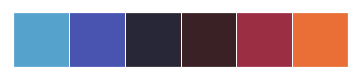

In [2]:
sns.palplot(sns.color_palette("icefire"))
# flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# sns.palplot(sns.color_palette(flatui))

Set the appropriate color palette using `sns.set_palette` function.

In [3]:
# sns.set_palette("icefire")
# sns.set_palette(flatui)

## Loading Datasets:

When working with Seaborn, we can either use [built-in datasets](https://github.com/mwaskom/seaborn-data) or we can load a Pandas DataFrame. 

In [4]:
# Load built-in Datasets.
iris = sns.load_dataset('iris')
#tips = sns.load_dataset('tips')
#titanic = sns.load_dataset('titanic')

iris.shape

(150, 5)

Lets sneek into how the data looks like.

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Iris dataset has 50 samples from each of the three species of Iris flower (Setosa, Virgnica and Versicolor). Four features were measured (in centimeters) from each sample: Length and Width of the Sepals and Petals.

In [6]:
# Load a custom dataset
df = pd.read_csv("../data/titanic.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let us try to visualize age of people who were on-board the Titanic.

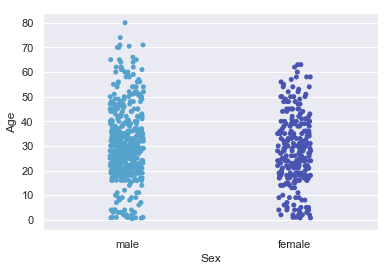

In [8]:
sns.stripplot(x="Sex", y="Age", data=df)

The above plot is known as `Strip Plot` and is pretty ideal for categorical values.

<div class="alert alert-block alert-success">
    <b> EXCERCISE </b>
    
   <ul> 
    <li> Melt the Titanic DataFrame on 'Sex' column, and plot the Age and Fare together using Strip Plot. </li> 
    </ul>
</div>

## Pair Plot

This function plots pairwise relation in the dataset.

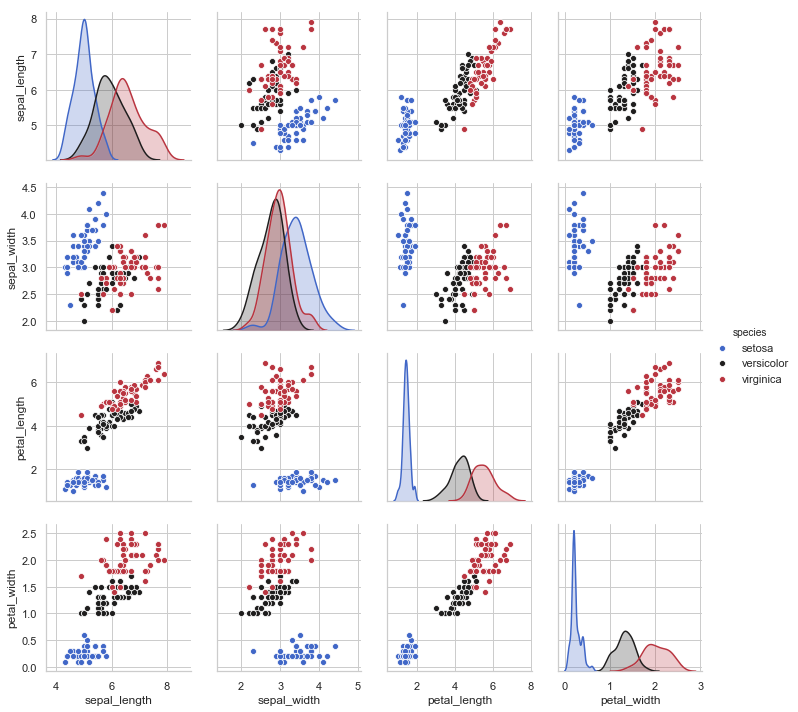

In [35]:
sns.pairplot(iris, hue="species", palette='icefire') # give palette='husl' if you want.

## Categorical Data Plot

**Categorical features** represent types of data which may be divided into groups. Examples of categorical variables are race, gender etc. 

We will be covering the following types of plots for categocal data.

* Swarmplot() and Stripplot() that shows each observation at each level of the categorical variable.
* Boxplot() and Violinplot() that shows an abstract representation of each distribution of observations.
* Barplot() and Pointplot() that apply a statistical estimation to show a measure of Central Tendency.

### Swarm plot

Use `pd.melt` function to convert above *DataFrame* from wide to long representation. Essentially this *melts* the entire DataFrame, keeping only the `id_vars` column. Look at the following section for more details. Can you see the difference in representation from above ?

In [10]:
# Loading iris dataset
iris = sns.load_dataset("iris")

iris = pd.melt(iris, "species", var_name="measurement")

iris.loc[iris["species"] == "setosa"].head()
iris.loc[iris["species"] == "virginica"].head()
iris.loc[iris["species"] == "versicolor"].head()

,species,measurement,value
50,versicolor,sepal_length,7.0
51,versicolor,sepal_length,6.4
52,versicolor,sepal_length,6.9
53,versicolor,sepal_length,5.5
54,versicolor,sepal_length,6.5


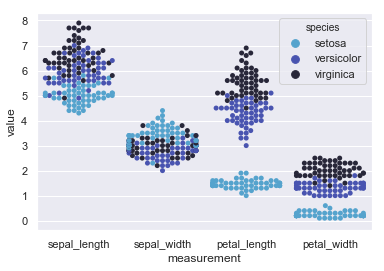

In [11]:
sns.swarmplot(x="measurement", y="value", hue="species", data=iris)

This plot is a scattered representation of non-overlapping points of the three species of Iris flower with difference in values of their *sepal length*, *sepal width*, *petal length* and *petal width*.

In [12]:
#help(sns.swarmplot)

### Strip Plot

In [13]:
# Load Tips dataset:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


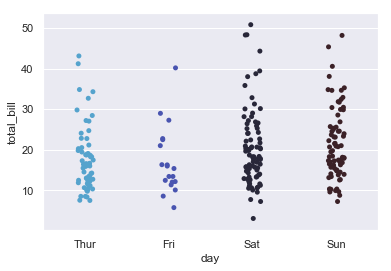

In [14]:
sns.stripplot(x="day",y="total_bill",data=tips)

The above is a `scatterplot presentation` with one of its variable as `Categorical`. To learn more about stripplot, look at `help(sns.striplot)`.

You can add more *optional* parameters to stripplot.

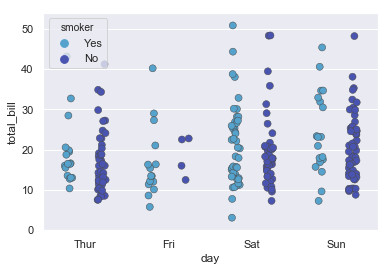

In [15]:
sns.stripplot(x="day", y="total_bill", hue="smoker", hue_order=["Yes","No"],data=tips, size=7, linewidth=0.5, dodge=True)

To remove legend from a figure.

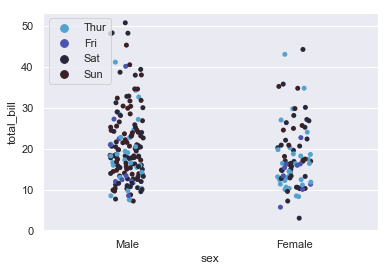

In [16]:
ax = sns.stripplot(x="sex", y="total_bill", hue="day", data=tips)

# Modify pos of legends.
ax.legend(loc='upper left') 
# ax.legend(loc='upper left', frameon=False) 
# ax.legend(loc='lower center', ncol=2)

# ax.legend_.remove()

### Box Plot

A **Box plot** shows the spread of all the data points, and also fetches other intrinsic information like the **median** or where most of the data cluster are. Basically, it is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the **second and third quartiles**, usually with a vertical line inside it, to indicate the median value. The **lower and upper quartiles** are shown as horizontal lines on either side of this rectangle

A **Quartile** is a type of **Quantile**, which are actually the **three cut points** dividing a **probability distribution** of a dataset into **four equal-size groups**. The **first quartile (Q1)** is defined as the middle number between the smallest number and the *median* of the data set. The **second quartile (Q2)** is the median of the dataset, and 50% of the data lies below this point. The **third quartile(Q3)** is the middle number between the median and the largest number in the dataset.

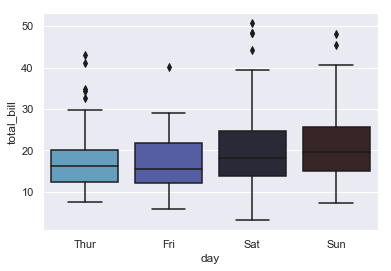

In [17]:
tips = sns.load_dataset("tips")

# Plotting basic Box Plot.
sns.boxplot(x="day", y="total_bill", data=tips)

There are **three horizontal bars** that we see here. Let us consider the first box on our plot, i.e. *Thursday* on X-axis.

* The **first bar** (top-most one), shows the **maximum range variation** at a total bill amount of 30.
* **Second bar** within the box, shows the **median** at a total bill amount of 15.
* The **third bar** at the bottom, shows the **minimum range variation** of total bill, somewhere around 8.

The box in the **Box plot** refer to quartiles, the **bottom line** is acually the first quartile, and **top line**, at a value of 20 is the **third quartile**. Finally, the **vertical line** connecting these bars are just an indicator of **range of data points**.

The **dots beyond the maximum range** are known as **Outliers**. Mathematically, these Outliers are generally at least 3 times the difference between the *third* and *first quartile*.

You can add more options to `sns.boxplot()`. To know details about the parameters, try `help(sns.boxplot)`.

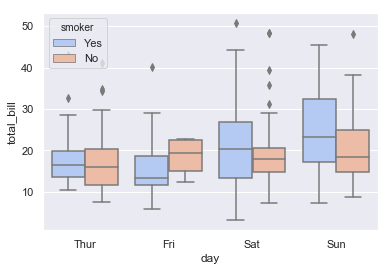

In [18]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm")

### Violin Plot

Sometimes just the **Central Tendency** isn't enough to understand a dataset, because it gets difficult to infer, if most of the values are clustered around the *median*, or are they clustered around the *min* and *max* peaks with actually nothing in the middle. With a **Box Plot**, we don't get variations in a *multi-modal distribution*. This is where **Violin plot** comes in handy, combining **Box Plot** and **KDE (Kernel Density Plot)**.

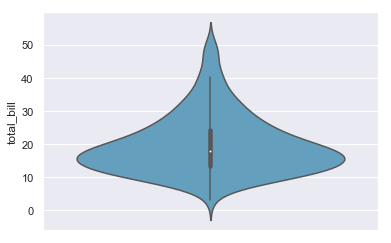

In [19]:
tips = sns.load_dataset("tips")

# Plot basic Violin plot.
sns.violinplot(y=tips["total_bill"])

1. The **thick bar** in the center represents the **Interquartile Range**, as in **Box plot**.
2. The **thin line** just above the thick one represents **95% Confidence Interval**. A **confidence interval** is a type of interval estimate that is computed from the observed data. 
3. The **spread** that forms the *Violine shape* is a **Kernal Density Estimation** to show the distribution shape of the data. **Wider** sections represent **higher probability** of members from the observed data. **Skinnier** sections represent data with lower probability.

In summary, a **Violin Plot** is a great represntation for visualizing the **Probability Density** of observed data.

You can add more options(different classes) to `sns.violinplot()`.

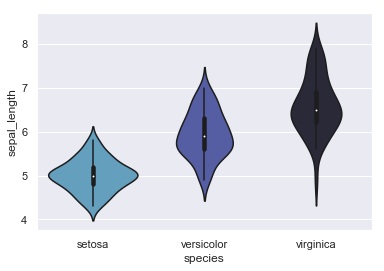

In [20]:
iris = sns.load_dataset("iris")

sns.violinplot(x="species", y="sepal_length", data=iris)

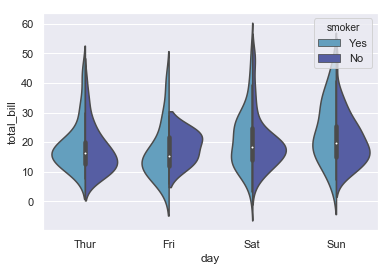

In [21]:
tips = sns.load_dataset("tips")

sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, split=True)

The `scale` parameter represents the method used for *scaling width* of each violin. By default, it is set to represent `area`. We can replace this with `count` to scale by number of observations in that bin or `width` for each violin to have same width.

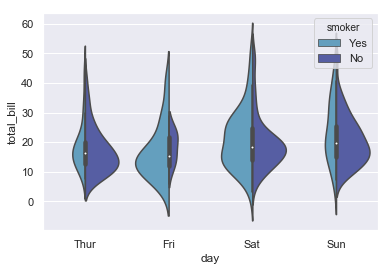

In [22]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, split=True, scale="count")

We can also add **statistical summary** to **annotate plot** with **number of observations** in the Violin plot.

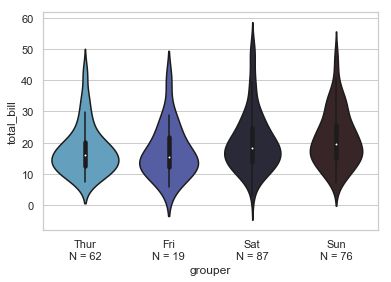

In [23]:
# Modify background styling. Beautification is upto your choice.
sns.set_style("whitegrid")

# Combine pandas commands together using .pipe() function.
(sns.load_dataset("tips")
    .assign(count = lambda df: df['day'].map(df.groupby(by=['day'])['total_bill'].count())) # total bill for each day
    .assign(grouper = lambda df: df['day'].astype(str) + '\nN = ' + df['count'].astype(str)) # for labels
    .sort_values(by='day')
    .pipe((sns.violinplot, 'data'), x="grouper", y="total_bill")
)

### Bar Plot

**Bar Plot** (or Bar Graphs) present Categorical data with rectangular bars with *height* proportional to the values that they represent, and can be plotted *vertically* or *horizontally*. When plotted vertically, these are referred to as **Line Graph**.

There can be different types of **Bar Plots**. These are as follows:

* **<span style="color:red">Simple Bar Plot</span>** that conveys  discrete values of an item for each category shown on the corresponding axis by plotting bars of *equal width* but *variable length*.
- **<span style="color:red">Stacked Bar Plot</span>** where bars represent *sub-groups* and are placed on top of each other to form a single column. Overall length of the bar gives us the total size of the category, and *different colors* indicate their relative contribution to each sub-group.
- **<span style="color:red">Grouped Bar Plot</span>** where we may have either *Scalar* or *Ordinal Independent variable*. In such plots, the bars for categorical variable values are close(or grouped) to each other.

In [24]:
titanic = pd.read_csv('../data/titanic.csv')

# Convert column 'Pclass' from numerical to categorical
titanic['Pclass'] = titanic['Pclass'].map({3:'Third',2:'Second',1:'First'}).astype('category')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


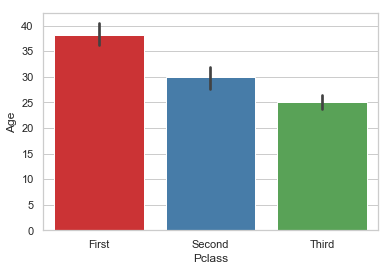

In [25]:
sns.barplot(x='Pclass', y='Age', data=titanic, palette="Set1")

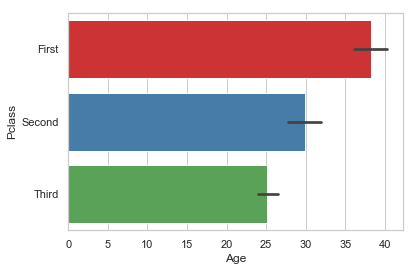

In [26]:
# Horizontal bars
sns.barplot(x='Age', y='Pclass', data=titanic, palette="Set1")

The **small grey lines** at the top center represent the [**Confidence Interval**](https://towardsdatascience.com/a-very-friendly-introduction-to-confidence-intervals-9add126e714).

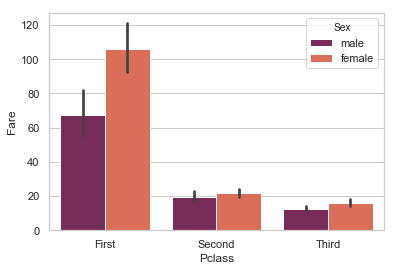

In [27]:
# You can use matplotlib to set font style for plots.
# plt.rcParams['font.family'] = "Times New Roman"

# Plot a set of vertical bars with nested grouping by gender/
sns.barplot(x="Pclass", y="Fare", hue="Sex", data=titanic, palette="rocket")

You can also add texts to each group in a `barplot()`.

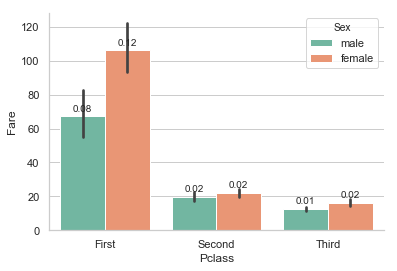

In [28]:
total = float(len(titanic))

ax = sns.barplot(x="Pclass", y="Fare", hue="Sex", data=titanic, palette="Set2")

sns.despine() # Remove top and right spines from figure.

# Looping over each bar:
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center")

Now, let us look at a simple demo on how to visualize a **Stacked Bar Plot**. The dummy dataset below has marksheet for 10 students who had enrolled for *Data Science*, *Machine Learning* and *Algorithms* courses. 

In [29]:
scorecard = pd.DataFrame({"Student_ID": list(range(10)), 
                          "Data Science": [2.393412671, 3.228434178, 6.611171616, 4.55351888, 4.151165323, 9.077035502, 7.039631096, 3.021068686, 5.011522874, 2.006190799],                      
                          "Machine Learning": [3.324129347, 3.109298649, 3.603703815, 5.030113742, 6.555816091, 7.478125262, 8.201300407, 8.306264399, 6.622167472, 4.272699487], 
                          "Algorithms": [0.039631096, 5.621414891, 4.830770027, 4.84697594, 4.126257144, 3.321003992, 2.667565198, 1.976072963, 1.220086585, 0.656404386]})

scorecard.head(10)

,Student_ID,Data Science,Machine Learning,Algorithms
0,0,2.393413,3.324129,0.039631
1,1,3.228434,3.109299,5.621415
2,2,6.611172,3.603704,4.830770
3,3,4.553519,5.030114,4.846976
4,4,4.151165,6.555816,4.126257
5,5,9.077036,7.478125,3.321004
6,6,7.039631,8.201300,2.667565
7,7,3.021069,8.306264,1.976073
8,8,5.011523,6.622167,1.220087
9,9,2.006191,4.272699,0.656404


Text(0.5, 0, 'Total Number of Students')

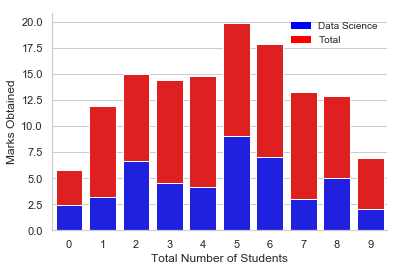

In [30]:
# Create a 'Total' column.
scorecard["Total"] = scorecard["Data Science"] + scorecard["Machine Learning"] + scorecard["Algorithms"]

# Plot 1: 'Total' marks obtained (Placing on Top)
sns.barplot(x = scorecard["Student_ID"], y = scorecard["Total"], color='r')

# Plot 2: 'Data Science' marks (Overlaying at Bottom)
ax = sns.barplot(x = scorecard["Student_ID"], y = scorecard["Data Science"], color='b')

# Aesthetics (Look into matplotlib for customization)
topbar = plt.Rectangle((0,0), 1, 1, fc='r', edgecolor='None')
bottombar = plt.Rectangle((0,0), 0, 0, fc='b', edgecolor='None')
l = plt.legend([bottombar, topbar], ["Data Science", "Total"], loc=1, ncol=1, prop={'size': 10})
l.draw_frame(False) # no box around legend.

# More aesthetics
sns.despine()
ax.set_ylabel("Marks Obtained")
ax.set_xlabel("Total Number of Students")

<div class="alert alert-block alert-success">
 
 <b> EXCERCISE: </b>
 
   <ul>
    <li> Plot a <span style="color:red">Stacked Bar plot</span> showing all the marks obtained from the three subjects.</li>
    <li> Can you further improve the aesthetics of the above plot ? Like show borders, average marks on top of each stack. </li>
   </ul>
    
</div>

## Plot Linear Regression Over Points

Plot a linear regression plot over a set of random data points.

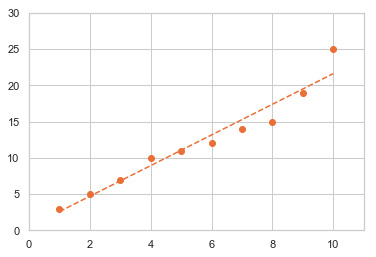

In [31]:
x = list(range(1,11))
y = [3,5,7,10,11,12,14,15,19,25]

fit = np.polyfit(x,y,1) # order of polynomial
# fit_fn is now a function which takes in x and returns an estimate for y
fit_fn = np.poly1d(fit)
plt.plot(x,y,'yo',x, fit_fn(x), '--', color='C5')
plt.xlim(0,11)
plt.ylim(0,30)
plt.show()

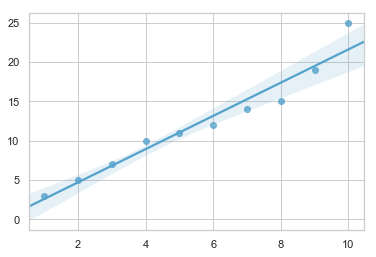

In [32]:
# You can improve the aesthetics using sns.regplot().

sns.regplot(x=x, y=y)

The shadow region is the **Confidence Interval (CI)** for fitting the linear regression.

## References

### Colormaps

1. Great tutorial on how to use color in plots [Subtelties of Color](https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/).
2. [Colormaps in matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html).
3. [Color palettes in seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial).